<a href="https://colab.research.google.com/github/faizan-abbas-mir/house_price_predictor/blob/main/placement_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



* prepricessing + eda + feature selection
* extracting input and output values
*   scale the values
*   train test split

*  train the model
*   evaluate the model

*   deploy the model

In [35]:
df = pd.read_csv("modified_placement_data.csv")

In [36]:
df.head()

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No


In [37]:
df['placement'] =df['placement'].map({'Yes': 1,'No': 0})

df.head()


,cgpa,iq,placement
0,"6,8",123.0,1
1,"5,9",106.0,0
2,"5,3",121.0,0
3,"7,4",132.0,1
4,"5,8",142.0,0


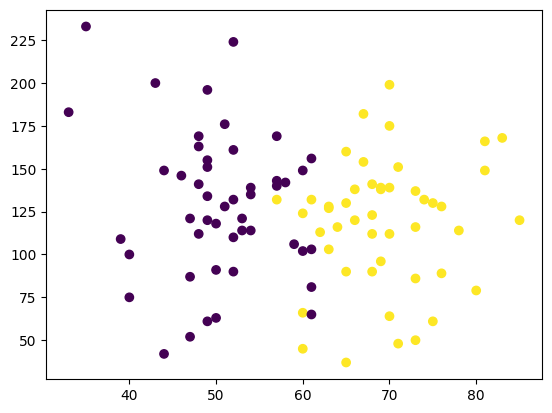

In [38]:
# prompt: write code con remove comma in iq


df['cgpa'] = df['cgpa'].str.replace(',', '').astype(float)
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [39]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]


In [40]:
X,Y

(    cgpa     iq
 0   68.0  123.0
 1   59.0  106.0
 2   53.0  121.0
 3   74.0  132.0
 4   58.0  142.0
 ..   ...    ...
 95  43.0  200.0
 96  44.0   42.0
 97  67.0  182.0
 98  63.0  103.0
 99  62.0  113.0
 
 [100 rows x 2 columns],
 0     1
 1     0
 2     0
 3     1
 4     0
      ..
 95    0
 96    0
 97    1
 98    1
 99    1
 Name: placement, Length: 100, dtype: int64)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1)

In [42]:
X_test

,cgpa,iq
9,NaN,66.0
13,64.0,116.0
65,81.0,166.0
6,57.0,143.0
39,46.0,146.0
44,75.0,61.0
36,57.0,140.0
49,54.0,135.0
64,70.0,64.0
93,68.0,112.0


In [43]:
X_train

,cgpa,iq
90,73.0,86.0
35,68.0,90.0
7,50.0,63.0
10,60.0,45.0
27,60.0,124.0
...,...,...
51,48.0,141.0
53,83.0,168.0
62,60.0,102.0
59,48.0,112.0


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scalar = StandardScaler()

In [46]:
X_train = scalar.fit_transform(X_train)
X_train

array([[ 1.16898988, -0.96420615],
       [ 0.73603066, -0.8641444 ],
       [-0.82262251, -1.53956122],
       [ 0.04329592, -1.98983909],
       [ 0.04329592, -0.01361952],
       [-1.34217357, -2.06488541],
       [-0.56284698, -0.26377389],
       [ 0.12988776,  0.78687449],
       [-0.56284698, -0.08866583],
       [ 1.16898988, -0.21374302],
       [-0.04329592, -0.46389739],
       [-1.68854094, -0.61399002],
       [-1.77513278, -0.38885108],
       [ 0.12988776, -0.53894371],
       [ 0.64943882,  1.43727587],
       [-1.08239804, -0.93919071],
       [        nan,  0.41164292],
       [-0.99580619,  0.96198255],
       [-0.47625514,  0.36161205],
       [ 0.30307145, -0.53894371],
       [ 1.77513278, -1.13931421],
       [-0.90921435, -0.11368127],
       [-1.42876541,  1.88755375],
       [-0.64943882, -0.36383564],
       [ 1.25558172,  0.18650399],
       [-0.90921435,  0.76185905],
       [-2.12150015,  2.71306319],
       [ 1.42876541, -0.88915984],
       [ 0.30307145,

In [47]:
X_test= scalar.transform(X_test)
X_test

array([[        nan, -1.4645149 ],
       [ 0.38966329, -0.21374302],
       [ 1.86172462,  1.03702887],
       [-0.21647961,  0.4616738 ],
       [-1.16898988,  0.53672011],
       [ 1.34217357, -1.58959209],
       [-0.21647961,  0.38662749],
       [-0.47625514,  0.2615503 ],
       [ 0.90921435, -1.51454578],
       [ 0.73603066, -0.31380477]])

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
clf = LogisticRegression()

In [52]:
from sklearn.impute import SimpleImputer

# Initialize the imputer, filling missing values with the mean of the column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print("X_train after imputation:")
display(X_train)
print("\nX_test after imputation:")
display(X_test)

X_train after imputation:


array([[ 1.16898988e+00, -9.64206149e-01],
       [ 7.36030665e-01, -8.64144398e-01],
       [-8.22622508e-01, -1.53956122e+00],
       [ 4.32959215e-02, -1.98983909e+00],
       [ 4.32959215e-02, -1.36195161e-02],
       [-1.34217357e+00, -2.06488541e+00],
       [-5.62846979e-01, -2.63773893e-01],
       [ 1.29887764e-01,  7.86874491e-01],
       [-5.62846979e-01, -8.86658292e-02],
       [ 1.16898988e+00, -2.13743018e-01],
       [-4.32959215e-02, -4.63897395e-01],
       [-1.68854094e+00, -6.13990021e-01],
       [-1.77513278e+00, -3.88851082e-01],
       [ 1.29887764e-01, -5.38943708e-01],
       [ 6.49438822e-01,  1.43727587e+00],
       [-1.08239804e+00, -9.39190711e-01],
       [-2.09780513e-17,  4.11642925e-01],
       [-9.95806194e-01,  9.61982554e-01],
       [-4.76255136e-01,  3.61612050e-01],
       [ 3.03071450e-01, -5.38943708e-01],
       [ 1.77513278e+00, -1.13931421e+00],
       [-9.09214351e-01, -1.13681267e-01],
       [-1.42876541e+00,  1.88755375e+00],
       [-6.


X_test after imputation:


array([[-2.09780513e-17, -1.46451490e+00],
       [ 3.89663293e-01, -2.13743018e-01],
       [ 1.86172462e+00,  1.03702887e+00],
       [-2.16479607e-01,  4.61673800e-01],
       [-1.16898988e+00,  5.36720113e-01],
       [ 1.34217357e+00, -1.58959209e+00],
       [-2.16479607e-01,  3.86627487e-01],
       [-4.76255136e-01,  2.61550299e-01],
       [ 9.09214351e-01, -1.51454578e+00],
       [ 7.36030665e-01, -3.13804769e-01]])

In [53]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [56]:
Y_pred=clf.predict(X_test)

In [55]:
Y_test

,placement
9,0
13,1
65,1
6,0
39,0
44,1
36,0
49,0
64,1
93,1


In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

1.0

In [62]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

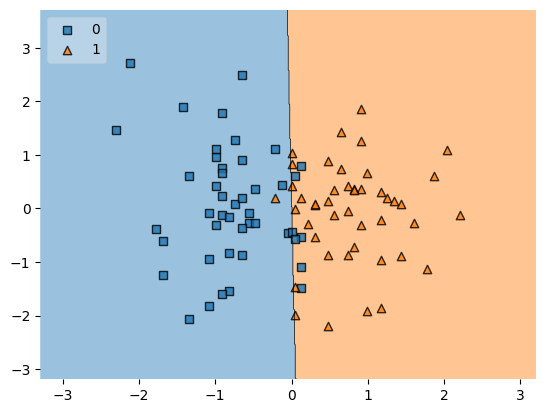

In [65]:
plot_decision_regions(X_train,Y_train.values, clf=clf, legend=2)

In [66]:
import pickle